In [1]:
from random import gauss
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import datetime
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [13]:
data = pd.read_csv("data.csv")
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close,date,year
0,2016-07-06,23.915001,23.592501,23.650000,23.882500,123796400.0,22.116472,2016-07-06,2016
1,2016-07-07,24.125000,23.905001,23.924999,23.985001,100558400.0,22.211391,2016-07-07,2016
2,2016-07-08,24.222500,24.012501,24.122499,24.170000,115648400.0,22.382711,2016-07-08,2016
3,2016-07-11,24.412500,24.182501,24.187500,24.245001,95179600.0,22.452164,2016-07-11,2016
4,2016-07-12,24.424999,24.280001,24.292500,24.355000,96670000.0,22.554028,2016-07-12,2016


In [14]:
# data
# start, end = datetime.date(2016, 7, 6), datetime.date(2021, 7, 6)
# data = pdr.get_data_yahoo("AAPL", start=start, end=end)
data["date"] = data.index
data["year"] = data["date"].astype(str).str.split("-", expand=True)[0]
data = data["Adj Close"].copy()

# GARCH(1,1) Model

$$
a_t = \varepsilon_t \sqrt
{\omega + \alpha_1
a_
{t - 1} ^ 2 +
\beta_1 \sigma_{t - 1} ^ 2}
$$

$$
a_0, a_1 \sim \mathcal
{N}(0, 1)
$$

$$
\sigma_0 = 1, \sigma_1 = 1
$$

$$
\varepsilon_t \sim \mathcal
{N}(0, 1)
$$

In [15]:
# create dataset
n = data.shape[0]

# params
omega = 0.5
alpha_1 = 0.1
beta_1 = 0.3

test_size = int(n * 0.1)

# a0, a1 : initialisation
series = [gauss(0, 1), gauss(0, 1)]

# sigma
vols = [1, 1]

for _ in range(n):
    new_vol = np.sqrt(
        omega +
        alpha_1 * series[-1] ** 2 +
        beta_1 * vols[-1] ** 2
    )
    new_val = gauss(0, 1) * new_vol

    vols.append(new_vol)
    series.append(new_val)

Text(0.5, 1.0, 'Simulated GARCH(1,1) Data')

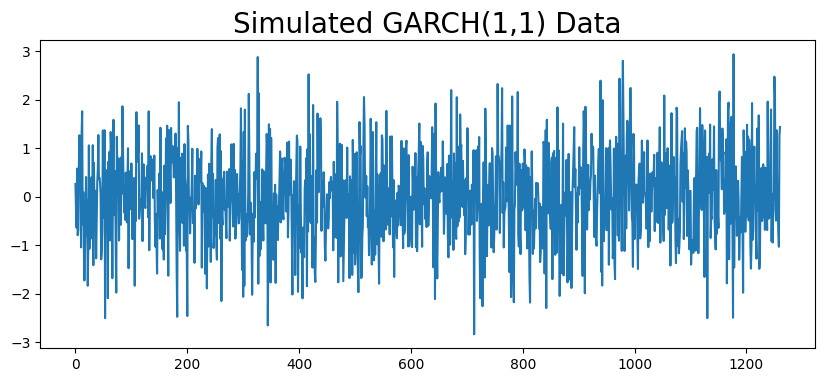

In [16]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.title('Simulated GARCH(1,1) Data', fontsize=20)

Text(0.5, 1.0, 'Data Volatility')

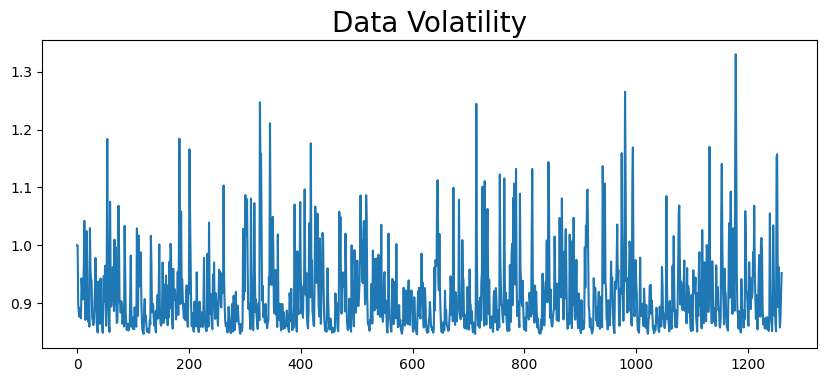

In [17]:
plt.figure(figsize=(10,4))
plt.plot(vols)
plt.title('Data Volatility', fontsize=20)

Text(0.5, 1.0, 'Data and Volatility')

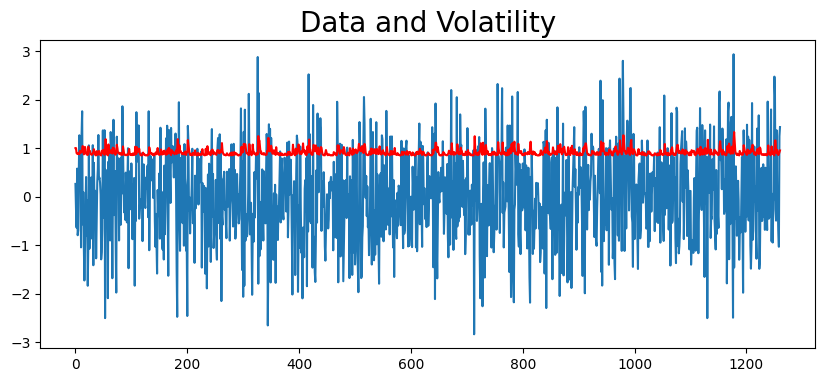

In [18]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.plot(vols, color='red')
plt.title('Data and Volatility', fontsize=20)

/Users/ahmedosman/PycharmProjects/streamlit/venv/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


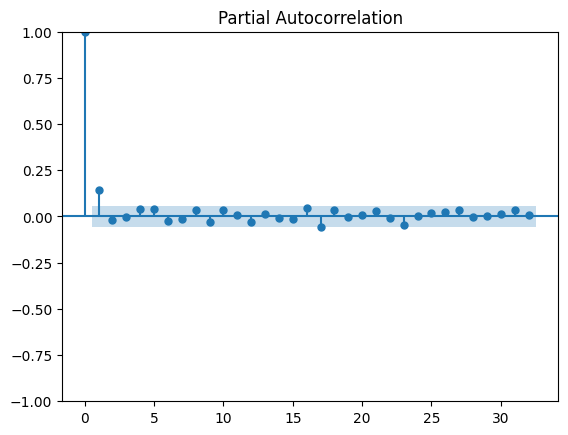

In [19]:
plot_pacf(np.array(series)**2)
plt.show()

# Fit the GARCH Model

In [20]:
train, test = series[:-test_size], series[-test_size:]

In [21]:
model = arch_model(train, p=2, q=2)

In [22]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 3252.312854429902
Iteration:      2,   Func. Count:     19,   Neg. LLF: 796543.3546736733
Iteration:      3,   Func. Count:     28,   Neg. LLF: 2915.3676727839243
Iteration:      4,   Func. Count:     37,   Neg. LLF: 1515.0975239812278
Iteration:      5,   Func. Count:     44,   Neg. LLF: 1515.1173127083844
Iteration:      6,   Func. Count:     52,   Neg. LLF: 1516.5215014027685
Iteration:      7,   Func. Count:     60,   Neg. LLF: 1514.718550907487
Iteration:      8,   Func. Count:     67,   Neg. LLF: 1514.7422212802464
Iteration:      9,   Func. Count:     75,   Neg. LLF: 1514.6802416128025
Iteration:     10,   Func. Count:     82,   Neg. LLF: 1514.6785212029633
Iteration:     11,   Func. Count:     89,   Neg. LLF: 1514.6782748325636
Iteration:     12,   Func. Count:     96,   Neg. LLF: 1514.6782592689306
Iteration:     13,   Func. Count:    103,   Neg. LLF: 1514.6782543591332
Iteration:     14,   Func. Count:    109,   Neg. LLF: 

In [23]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1514.68
Distribution:                  Normal   AIC:                           3041.36
Method:            Maximum Likelihood   BIC:                           3071.57
                                        No. Observations:                 1136
Date:                Wed, Dec 28 2022   Df Residuals:                     1135
Time:                        16:19:46   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu            -0.0105  2.727e-02     -0.384      0.701 [-6.392e-02,4.298e-02]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.4112      0.542      0.759      0.448   [ -0.651,  1.473]
alpha[1]       0.1237  5.096e-02      2.427  1.523e-02 [2.379e-02,  0.224]
alpha[2]   1.2941e-14      0.164  7.885e-14      1.000   [ -0.322,  0.322]
beta[1]        0.1873      1.110      0.169      0.866   [ -1.988,  2.363]
beta[2]        0.2088      0.514      0.406      0.685   [ -0.798,  1.216]
==========================================================================

Covariance estimator: robust
"""

# Predict

In [24]:
predictions = model_fit.forecast(horizon=test_size)

/Users/ahmedosman/PycharmProjects/streamlit/venv/lib/python3.9/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


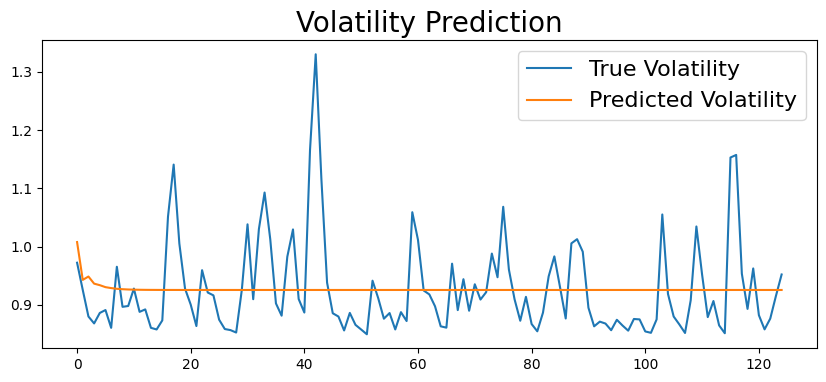

In [25]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :]))
plt.title('Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

/Users/ahmedosman/PycharmProjects/streamlit/venv/lib/python3.9/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


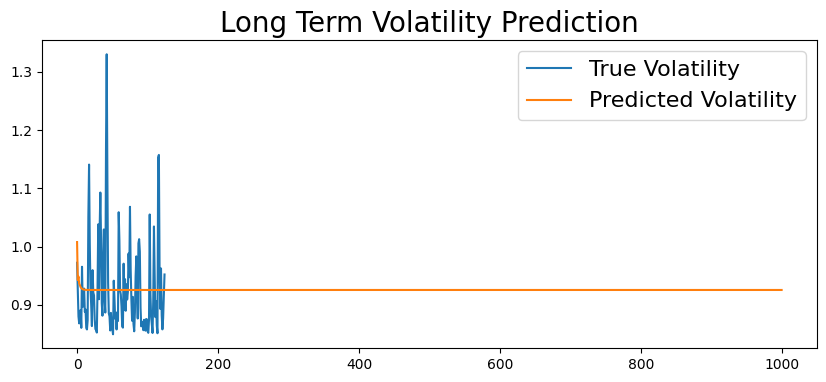

In [26]:
predictions_long_term = model_fit.forecast(horizon=1000)
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions_long_term.variance.values[-1, :]))
plt.title('Long Term Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

# Rolling Forecast Origin

In [27]:
rolling_predictions = []
for i in range(test_size):
    train = series[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

/Users/ahmedosman/PycharmProjects/streamlit/venv/lib/python3.9/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
/Users/ahmedosman/PycharmProjects/streamlit/venv/lib/python3.9/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
/Users/ahmedosman/PycharmProjects/streamlit/venv/lib/python3.9/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is Tr

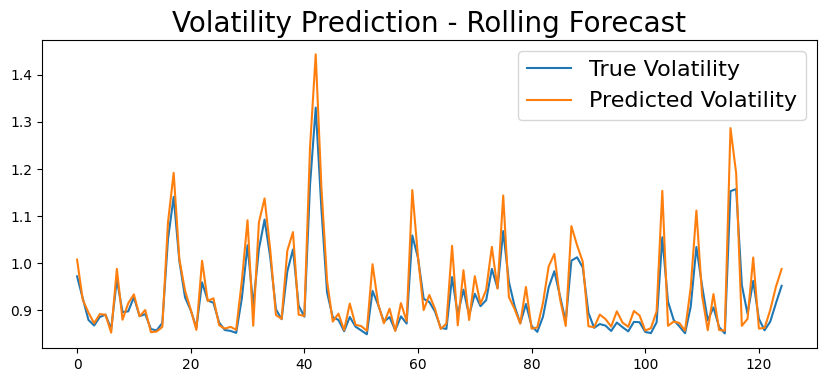

In [28]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)